In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import json

import cv2
import torch
from tqdm import tqdm_notebook
from PIL import Image, ImageFile
from torch.utils.data import Dataset, DataLoader
import torchvision

/home/briancy2/.conda/envs/iwildcam/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
META_DIR = "data/metadata/metadata/"
TRAIN_DIR = "data/train/train/"

train_data = json.load(open(META_DIR + 'iwildcam2022_train_annotations.json'))
test_data = json.load(open(META_DIR + 'iwildcam2022_test_information.json'))
detections_data = json.load(open(META_DIR + 'iwildcam2022_mdv4_detections.json'))

In [4]:
train_seq_count = pd.read_csv(META_DIR+"train_sequence_counts.csv")

In [7]:
ar = train_seq_count["count"].to_numpy()

In [8]:
np.mean((np.array(counts) - ar)**2)

array([9, 9, 9, ..., 5, 4, 5])

In [4]:
!git clone --recurse-submodules https://github.com/mikel-brostrom/Yolov5_DeepSort_OSNet.git

Cloning into 'Yolov5_DeepSort_OSNet'...
remote: Enumerating objects: 1255, done.
remote: Total 1255 (delta 0), reused 0 (delta 0), pack-reused 1255
Receiving objects: 100% (1255/1255), 21.28 MiB | 40.65 MiB/s, done.
Resolving deltas: 100% (610/610), done.
Submodule 'deep_sort/deep/reid' (https://github.com/KaiyangZhou/deep-person-reid) registered for path 'deep_sort/deep/reid'
Submodule 'yolov5' (https://github.com/ultralytics/yolov5.git) registered for path 'yolov5'
Cloning into '/home/briancy2/iwildcam2022/Yolov5_DeepSort_OSNet/deep_sort/deep/reid'...
remote: Enumerating objects: 9823, done.        
remote: Total 9823 (delta 0), reused 0 (delta 0), pack-reused 9823        
Receiving objects: 100% (9823/9823), 9.55 MiB | 28.92 MiB/s, done.
Resolving deltas: 100% (7270/7270), done.
Cloning into '/home/briancy2/iwildcam2022/Yolov5_DeepSort_OSNet/yolov5'...
remote: Enumerating objects: 13286, done.        
remote: Total 13286 (delta 0), reused 0 (delta 0), pack-reused 13286        
Recei

In [11]:
!git commit -am "added yolov5 deep sort repo"


[main c14d4e6] added yolov5 deep sort repo
 2 files changed, 66 insertions(+), 4 deletions(-)
 create mode 160000 Yolov5_DeepSort_OSNet


In [14]:
!git clone https://github.com/nwojke/deep_sort.git

Cloning into 'deep_sort'...
remote: Enumerating objects: 141, done.
remote: Total 141 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (141/141), 65.58 KiB | 4.10 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [15]:
!cd deep_sort

In [16]:
!rm -rf .git

In [20]:
%cd iwildcam2022/

/home/briancy2/iwildcam2022


In [21]:
!git status

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [100]:
detections_data["info"]

{'detection_completion_time': '2022-03-03 08:19:19', 'format_version': '1.0'}

In [10]:
!git add .

In [4]:
MASKS_DIR = "data/instance_masks/instance_masks/"

In [7]:
df_train = pd.DataFrame({'id': [item['id'] for item in train_data['images']],
                                'seq_id': [item['seq_id'] for item in train_data['images']],
                                'file_name': [item['file_name'] for item in train_data['images']],
                                'location': [item['location'] for item in train_data['images']],
                                'seq_num_frames': [item['seq_num_frames'] for item in train_data['images']],
                                'seq_frame_num': [item['seq_frame_num'] for item in train_data['images']]})


In [16]:
from tqdm import tqdm
paths = []
for path in tqdm(os.listdir(MASKS_DIR)):
    im = torchvision.io.read_image(MASKS_DIR+path)
    if np.unique(im.numpy()).shape[0] > 5:
        paths.append(path)

  0%|          | 416/150221 [00:19<1:58:53, 21.00it/s]


KeyboardInterrupt: 

In [30]:
path = paths[0]

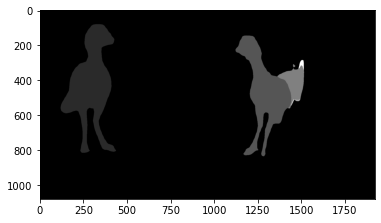

In [31]:
from IPython.display import Image
import torchvision
Image(filename=MASKS_DIR+path)
im = torchvision.io.read_image(MASKS_DIR+path)
im = torch.reshape(im, (im.shape[1], im.shape[2]))
imgplot = plt.imshow(im, cmap='gray')

In [46]:
detections = json.load(open(META_DIR+"iwildcam2022_mdv4_detections.json"))['images']
det_dict = dict()
for detection in tqdm(detections):
    det_dict[detection['file']] = detection['detections']
df_train = pd.DataFrame({'file': [item['file'] for item in detections],
                                'detections': [item['detections'] for item in detections]})


TypeError: string indices must be integers

In [41]:
'test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg'.split('/')[1]

'87aaf7d4-21bc-11ea-a13a-137349068a90.jpg'

In [38]:
df['images']

[{'file': 'test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg',
  'max_detection_conf': 0.999,
  'detections': [{'category': '1',
    'conf': 0.999,
    'bbox': [0.534, 0.464, 0.091, 0.249]}]},
 {'file': 'test/8e1b2332-21bc-11ea-a13a-137349068a90.jpg',
  'max_detection_conf': 0.999,
  'detections': [{'category': '1',
    'conf': 0.999,
    'bbox': [0.393, 0.811, 0.129, 0.17]}]},
 {'file': 'test/9592359c-21bc-11ea-a13a-137349068a90.jpg',
  'max_detection_conf': 0.0,
  'detections': []},
 {'file': 'test/91c938f2-21bc-11ea-a13a-137349068a90.jpg',
  'max_detection_conf': 0.998,
  'detections': [{'category': '1',
    'conf': 0.998,
    'bbox': [0.404, 0.394, 0.262, 0.348]},
   {'category': '2', 'conf': 0.387, 'bbox': [0.334, 0.432, 0.056, 0.195]}]},
 {'file': 'test/935cafbe-21bc-11ea-a13a-137349068a90.jpg',
  'max_detection_conf': 0.0,
  'detections': []},
 {'file': 'test/98f01858-21bc-11ea-a13a-137349068a90.jpg',
  'max_detection_conf': 0.999,
  'detections': [{'category': '1',
    'conf': 0.99

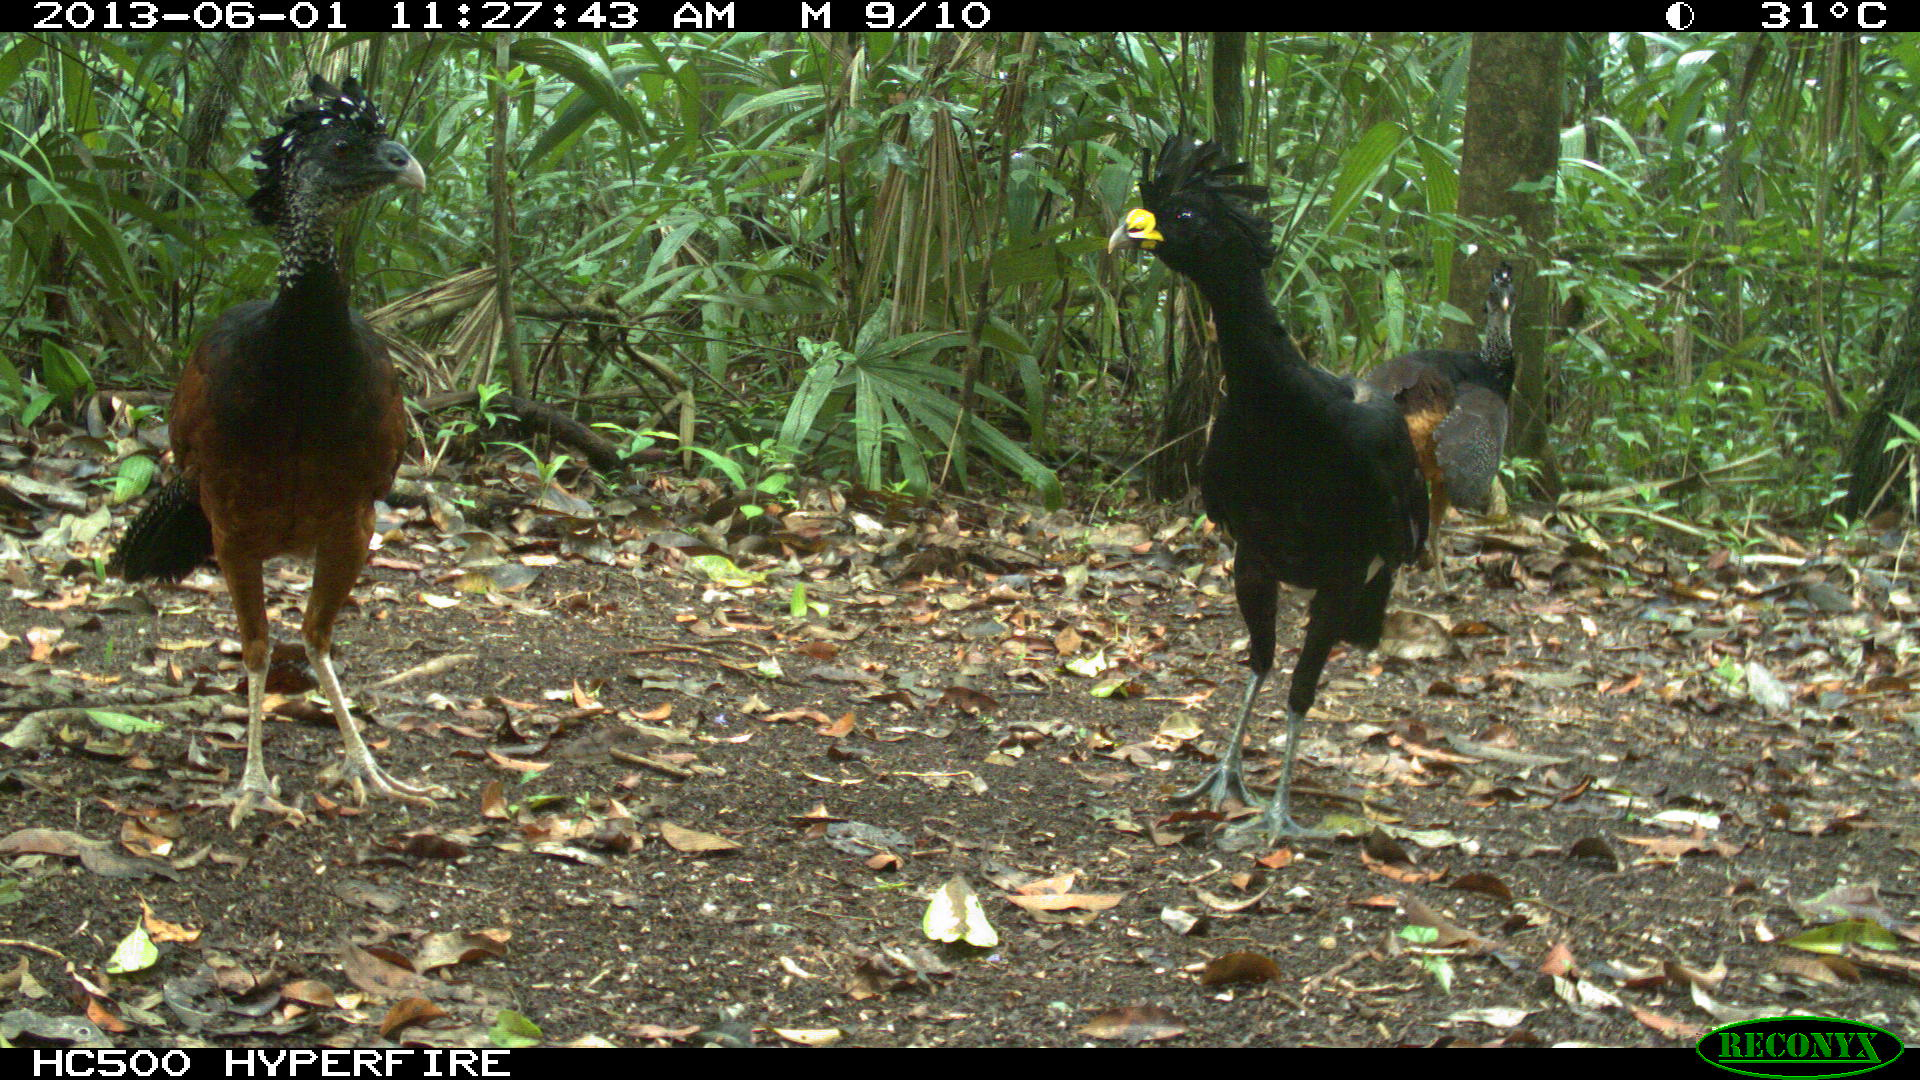

In [32]:
Image(filename=TRAIN_DIR+path.replace('.png', '.jpg'))

In [25]:
np.unique(im).shape

(24,)

In [26]:
!git add .
!git commit -am "masks eda"

[main 16c8a7b] masks eda
 1 file changed, 120 insertions(+), 48 deletions(-)


In [ ]:
import torchvision
transforms = torchvision.transforms.Resize(size=(640, 640))

class MaskDataset(Dataset):
    
    def __init__(self,
                 df,
                 images_dir,
                 seq_count,
                 img_size=1024
                ):
        self.df = df
        self.images_dir = images_dir
        self.seq_count = seq_count
        self.img_size = img_size
        self.cached_items = []
        self.seq_count = pd.read_csv(META_DIR + 'train_sequence_counts.csv')
    
    def __len__(self):
        return self.seq_count.shape[0]
    
    def __getitem__(self, idx): 
        cur_idx_row = self.seq_count.iloc[idx]
        y = int(cur_idx_row['count'])
        img_rows = self.df.loc[self.df.seq_id == cur_idx_row['seq_id']]
        torch.cat(tensors, dim=0, , out=None) 
        for index, img_row in img_rows.iterrows():
           img_path = os.path.join(self.images_dir, img_row['file_name'])
           im = torchvision.io.read_image(MASKS_DIR+img_path+'.png')
           out[:,:,:,img_row['seq_frame_num']] = transforms(torch.reshape(im, (im.shape[1], im.shape[2]))
        padded_out = F.pad(out, pad=(10 - out.shape[3], 0, 0, 0, 0, 0, 0, 0))
        return padded_out, y

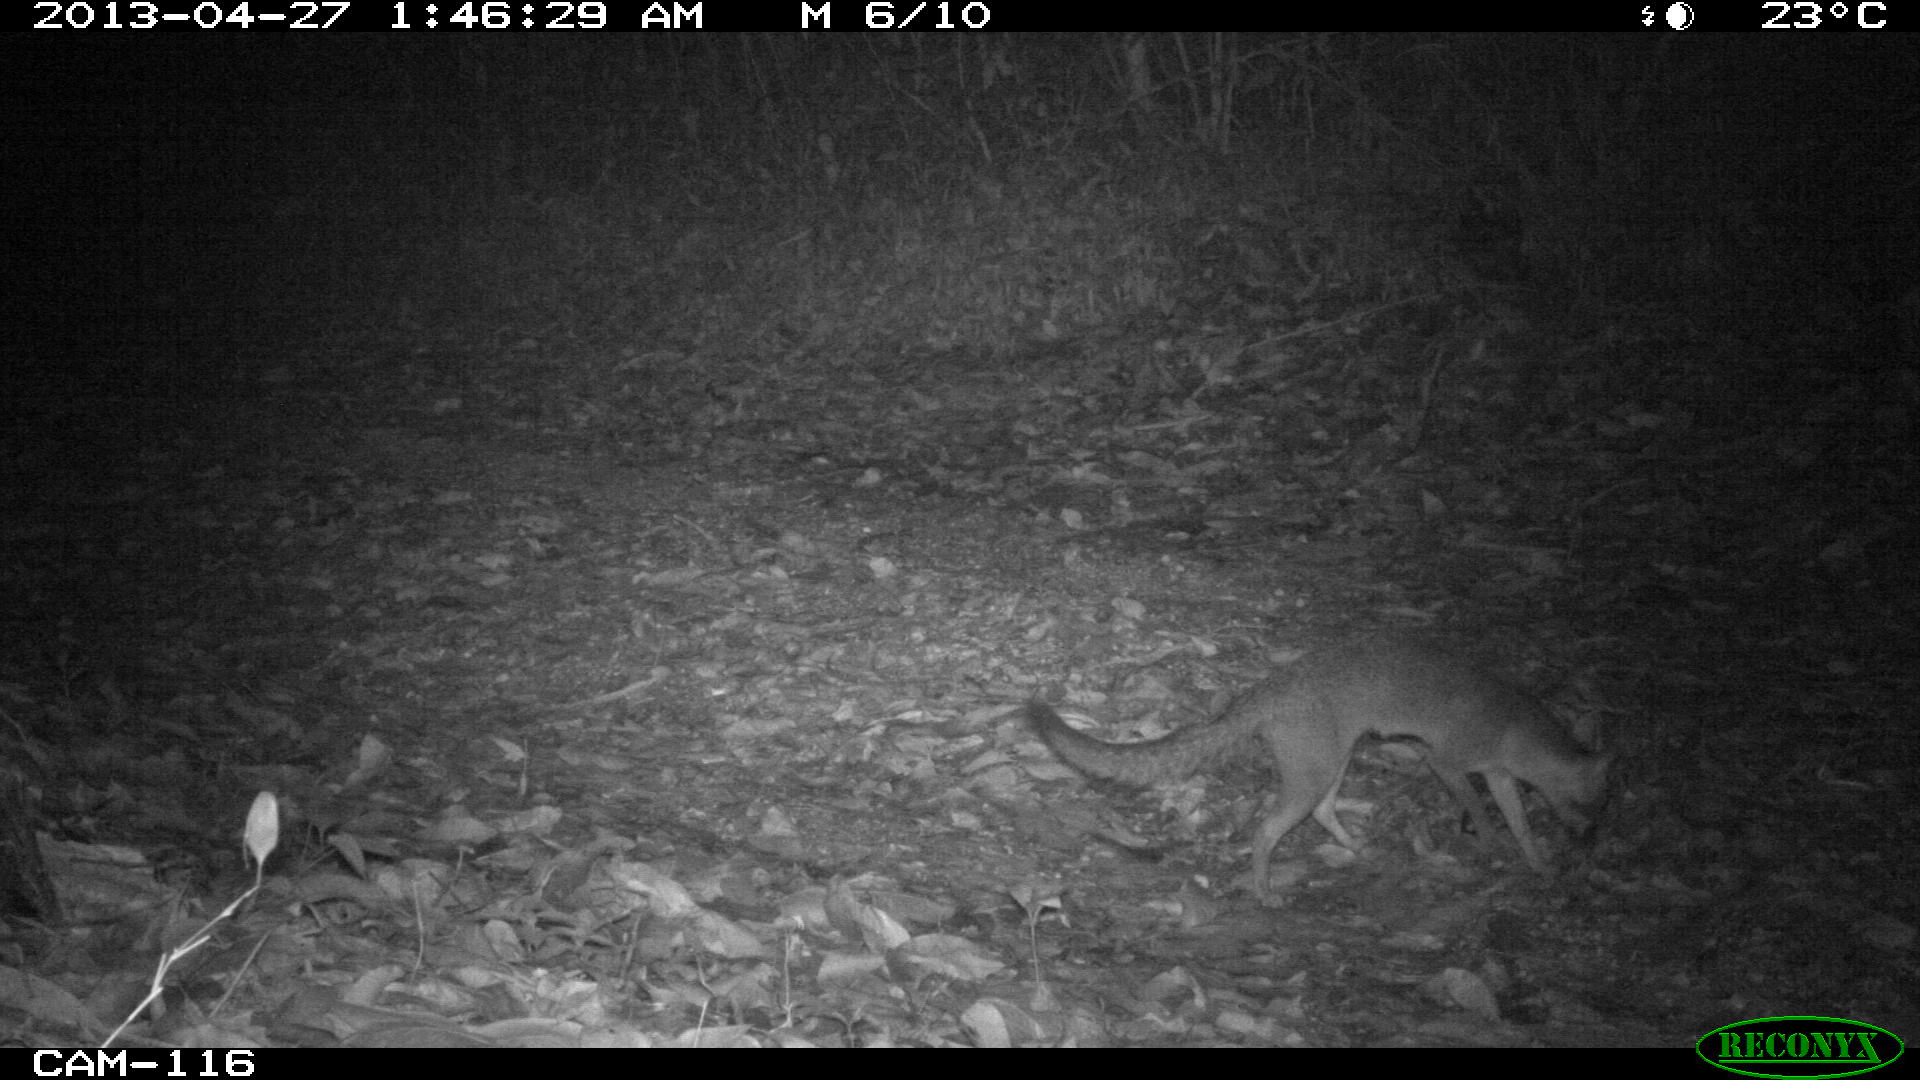

In [101]:
Image(filename="data/train/train/"+'8cb8fc12-21bc-11ea-a13a-137349068a90.png'.replace('png', 'jpg'))


In [90]:
im.shape

torch.Size([1080, 1920])

In [85]:
np.nonzero(im)

tensor([[   0,  637, 1357],
        [   0,  637, 1358],
        [   0,  637, 1359],
        ...,
        [   0,  902, 1275],
        [   0,  902, 1276],
        [   0,  903, 1274]])

In [117]:
print(im[650][600].item())

2


In [118]:
# if there are multiple objects in mask, the pixel value of mask numbered as integer exists

In [113]:
print(im[600][800].item())

1


In [3]:
seq_count = pd.read_csv(META_DIR + 'train_sequence_counts.csv')

In [ ]:
detections_data.keys()

dict_keys(['detection_categories', 'info', 'images'])

In [ ]:
for seq in seq_cou

In [4]:
detections_data["images"][0]

{'file': 'test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg',
 'max_detection_conf': 0.999,
 'detections': [{'category': '1',
   'conf': 0.999,
   'bbox': [0.534, 0.464, 0.091, 0.249]}]}

In [15]:
train_data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [5]:
image_json = detections_data['images']

In [19]:
cur_idx_row = seq_count.iloc[0]


In [20]:
cur_idx_row

seq_id    95dae922-21bc-11ea-a13a-137349068a90
count                                        9
Name: 0, dtype: object

In [57]:
df_detection_keys = pd.DataFrame({'file': [item['file'] for item in image_json],
                                'idx': [0 for idx in range(len(image_json))]})

In [32]:
df_detection_keys.loc[df_detection_keys['file']==('test/'+'87aaf7d4-21bc-11ea-a13a-137349068a90.jpg')].index.tolist()[0]

0

In [18]:
print(df_detection_keys.loc('file'=='test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg'))

In [9]:
df_detection_keys.loc(file='test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg')

TypeError: __call__() got an unexpected keyword argument 'file'

In [52]:
df_test = pd.DataFrame({'id': [item['id'] for item in test_data['images']],
                                'seq_id': [item['seq_id'] for item in test_data['images']],
                                'file_name': [item['file_name'] for item in test_data['images']],
                                'location': [item['location'] for item in test_data['images']],
                                'seq_num_frames': [item['seq_num_frames'] for item in test_data['images']],
                                'seq_frame_num': [item['seq_frame_num'] for item in test_data['images']]})



In [56]:
seq_list = df_test['seq_id'].drop_duplicates().tolist()

In [ ]:
from tqdm import tqdm
file = open('submission.txt', 'a')
file.write("Id,Predicted")
for i, seq in enumerate(tqdm(seq_list)):
    all_dets = []
    img_rows = df_test.loc[df_test.seq_id == seq]
    for index, img_row in img_rows.iterrows():
        img_idx = df_detection_keys.loc[df_detection_keys['file']==('test/'+img_row['file_name'])].index.tolist()[0]
        detections = image_json[img_idx]['detections']
        filtered_det = [det for det in detections if det['conf'] > 0.95]
        all_dets.append(len(filtered_det)) 
    file.write('\n' + seq + ',' + str(max(all_dets)))
file.close()

 81%|████████  | 8898/11028 [14:39<04:54,  7.24it/s]

In [6]:
seq_count = pd.read_csv(META_DIR + 'train_sequence_counts.csv')

In [7]:
detections_data['images'][0]

{'file': 'test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg',
 'max_detection_conf': 0.999,
 'detections': [{'category': '1',
   'conf': 0.999,
   'bbox': [0.534, 0.464, 0.091, 0.249]}]}

In [9]:
print(train_data['images'][0])
print(train_data['annotations'][0])
print(train_data['categories'][0])

{'seq_num_frames': 6, 'location': 3, 'datetime': '2013-06-05 05:44:19.000', 'id': '8b02698a-21bc-11ea-a13a-137349068a90', 'seq_id': '30048d32-7d42-11eb-8fb5-0242ac1c0002', 'width': 1920, 'height': 1080, 'file_name': '8b02698a-21bc-11ea-a13a-137349068a90.jpg', 'sub_location': 0, 'seq_frame_num': 0}
{'id': 'a292dd3c-21bc-11ea-a13a-137349068a90', 'image_id': '96b00332-21bc-11ea-a13a-137349068a90', 'category_id': 73}
{'id': 0, 'name': 'empty'}


In [ ]:
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [5]:
# %%time
# import tqdm

# indices = []
# for i in tdqm(df_train['file_name']):
#     try:
#         Image.open(TRAIN_DIR + i)
#     except:        
#         print(i)
#         df_train.drop(df_train.loc[df_train['file_name']==i].index, inplace=True)

In [ ]:
import torchvision
cur_idx_row = seq_count.iloc[0]
y = int(cur_idx_row['count'])
img_rows = df_train.loc[df_train.seq_id == cur_idx_row['seq_id']]
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for index, img_row in img_rows.iterrows():
    img_path = os.path.join(self.images_dir, img_row['file_name'])
    out.write(torchvision.io.read_image(img_path))
out.release()    
    

NameError: name 'size' is not defined

In [ ]:
df_test = pd.DataFrame({'id': [item['id'] for item in test_data['annotations']],
                                'category_id': [item['category_id'] for item in test_data['annotations']],
                                'image_id': [item['image_id'] for item in test_data['annotations']],
                                'seq_id': [item['seq_id'] for item in test_data['images']],
                                'file_name': [item['file_name'] for item in test_data['images']],
                                'location': [item['location'] for item in test_data['images']],
                                'seq_num_frames': [item['seq_num_frames'] for item in test_data['images']],
                                'seq_frame_num': [item['seq_frame_num'] for item in test_data['images']]})


In [8]:
import torchvision

In [9]:
import tqdm

In [10]:
import torchvision.transforms as T
import torch.nn.functional as F

In [3]:
!kaggle competitions download -c iwildcam2022-fgvc9


100%|███████████████████████████████████████▉| 101G/101G [31:59<00:00, 57.0MB/s]
100%|████████████████████████████████████████| 101G/101G [31:59<00:00, 56.7MB/s]


In [ ]:
!unzip iwildcam2022-fgvc9.zip

Archive:  iwildcam2022-fgvc9.zip
  inflating: instance_masks/instance_masks/86760c00-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/86761d58-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/86762118-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/867624e2-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/867634be-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/8676382e-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/867649ea-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/86764ddc-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/867654b2-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/86765afc-21bc-11ea-a13a-137349068a90.png  
  inflating: instance_masks/instance_masks/867661c8-21bc-11ea-a13a-137349068a90.png  
  inflating: instance

In [11]:
# https://github.com/ultralytics/yolov3/blob/master/utils/datasets.py code for yolo dataset

In [17]:
transforms = T.Compose(
           [
            T.ConvertImageDtype(torch.float32),
            #T.Normalize(mean=0.5, std=0.5),  # map [0, 1] into [-1, 1]
            T.Resize(size=(1024, 1024)),
           ])
META_DIR = "data/metadata/metadata/"
TRAIN_DIR = "data/train/train/"

train_data = json.load(open(META_DIR + 'iwildcam2022_train_information.json'))
test_data = json.load(open(META_DIR + 'iwildcam2022_test_information.json'))
detections_data = json.load(open(META_DIR + 'iwildcam2022_mdv4_detections.json'))

class CamDataset(Dataset):
    
    def __init__(self,
                 df,
                 images_dir,
                 seq_count,
                 img_size=1024
                ):
        self.df = df
        self.images_dir = images_dir
        self.seq_count = seq_count
        self.img_size = img_size
        self.cached_items = []
        train_data = json.load(open(META_DIR + 'iwildcam2022_train_annotations.json'))
        
        
    
    def __len__(self):
        return self.seq_count.shape[0]
    
#     def __getitem__(self, idx): 
#         cur_idx_row = self.seq_count.iloc[idx]
#         y = int(cur_idx_row['count'])
#         img_rows = self.df.loc[self.df.seq_id == cur_idx_row['seq_id']]
#         out = torch.zeros(1024,1024,3,img_rows.iloc[0].seq_num_frames)
#         for index, img_row in img_rows.iterrows():
#            img_path = os.path.join(self.images_dir, img_row['file_name'])
           
#            out[:,:,:,img_row['seq_frame_num']] = transforms(torchvision.io.read_image(img_path)).permute(1,2,0)
#         padded_out = F.pad(out, pad=(10 - out.shape[3], 0, 0, 0, 0, 0, 0, 0))
#         return padded_out, y    


        
            
        

In [ ]:
transforms = T.Compose(
           [
            T.ConvertImageDtype(torch.float32),
            #T.Normalize(mean=0.5, std=0.5),  # map [0, 1] into [-1, 1]
            T.Resize(size=(640, 640)),
           ])

class VOCDetection(Dataset):

    """
    VOC Detection Dataset Object
    input is image, target is annotation
    Args:
        root (string): filepath to VOCdevkit folder.
        image_set (string): imageset to use (eg. 'train', 'val', 'test')
        transform (callable, optional): transformation to perform on the
            input image
        target_transform (callable, optional): transformation to perform on the
            target `annotation`
            (eg: take in caption string, return tensor of word indices)
        dataset_name (string, optional): which dataset to load
            (default: 'VOC2007')
    """

    def __init__(
        self,
        data_dir,
        img_size=(640, 640),
    ):
        super().__init__(img_size)
        self.root = data_dir
        self.img_size=img_size

    def __len__(self):
        return len(self.ids)
    
@Dataset.mosaic_getitem
    def __getitem__(self, index):
        img, target, img_info, img_id = self.pull_item(index)
        cur_idx_row = self.seq_count.iloc[idx]
        y = int(cur_idx_row['count'])
        img_rows = self.df.loc[self.df.seq_id == cur_idx_row['seq_id']]
        out = torch.zeros(1024,1024,3,img_rows.iloc[0].seq_num_frames)

        return img, target, img_info, img_id
    
    
    def load_anno_from_ids(self, index):
        img_id = self.ids[index]
        target = ET.parse(self._annopath % img_id).getroot()

        assert self.target_transform is not None
        res, img_info = self.target_transform(target)
        height, width = img_info

        r = min(self.img_size[0] / height, self.img_size[1] / width)
        res[:, :4] *= r
        resized_info = (int(height * r), int(width * r))

        return (res, img_info, resized_info)

    def load_anno(self, index):
        return self.annotations[index][0]

    def load_resized_img(self, index):
        img = self.load_image(index)
        r = min(self.img_size[0] / img.shape[0], self.img_size[1] / img.shape[1])
        resized_img = cv2.resize(
            img,
            (int(img.shape[1] * r), int(img.shape[0] * r)),
            interpolation=cv2.INTER_LINEAR,
        ).astype(np.uint8)

        return resized_img

    def load_image(self, index):
        img_id = self.ids[index]
        img = cv2.imread(self._imgpath % img_id, cv2.IMREAD_COLOR)
        assert img is not None, f"file named {self._imgpath % img_id} not found"

        return img

    def pull_item(self, index):
        """Returns the original image and target at an index for mixup
        Note: not using self.__getitem__(), as any transformations passed in
        could mess up this functionality.
        Argument:
            index (int): index of img to show
        Return:
            img, target
        """
        if self.imgs is not None:
            target, img_info, resized_info = self.annotations[index]
            pad_img = self.imgs[index]
            img = pad_img[: resized_info[0], : resized_info[1], :].copy()
        else:
            img = self.load_resized_img(index)
            target, img_info, _ = self.annotations[index]

        return img, target, img_info, index

    @Dataset.mosaic_getitem
    def __getitem__(self, index):
        img, target, img_info, img_id = self.pull_item(index)

        if self.preproc is not None:
            img, target = self.preproc(img, target, self.input_dim)

        return img, target, img_info, img_id

    def evaluate_detections(self, all_boxes, output_dir=None):
        """
        all_boxes is a list of length number-of-classes.
        Each list element is a list of length number-of-images.
        Each of those list elements is either an empty list []
        or a numpy array of detection.
        all_boxes[class][image] = [] or np.array of shape #dets x 5
        """
        self._write_voc_results_file(all_boxes)
        IouTh = np.linspace(
            0.5, 0.95, int(np.round((0.95 - 0.5) / 0.05)) + 1, endpoint=True
        )
        mAPs = []
        for iou in IouTh:
            mAP = self._do_python_eval(output_dir, iou)
            mAPs.append(mAP)

        print("--------------------------------------------------------------")
        print("map_5095:", np.mean(mAPs))
        print("map_50:", mAPs[0])
        print("--------------------------------------------------------------")
        return np.mean(mAPs), mAPs[0]

    def _get_voc_results_file_template(self):
        filename = "comp4_det_test" + "_{:s}.txt"
        filedir = os.path.join(self.root, "results", "VOC" + self._year, "Main")
        if not os.path.exists(filedir):
            os.makedirs(filedir)
        path = os.path.join(filedir, filename)
        return path

    def _write_voc_results_file(self, all_boxes):
        for cls_ind, cls in enumerate(VOC_CLASSES):
            cls_ind = cls_ind
            if cls == "__background__":
                continue
            print("Writing {} VOC results file".format(cls))
            filename = self._get_voc_results_file_template().format(cls)
            with open(filename, "wt") as f:
                for im_ind, index in enumerate(self.ids):
                    index = index[1]
                    dets = all_boxes[cls_ind][im_ind]
                    if dets == []:
                        continue
                    for k in range(dets.shape[0]):
                        f.write(
                            "{:s} {:.3f} {:.1f} {:.1f} {:.1f} {:.1f}\n".format(
                                index,
                                dets[k, -1],
                                dets[k, 0] + 1,
                                dets[k, 1] + 1,
                                dets[k, 2] + 1,
                                dets[k, 3] + 1,
                            )
                        )

    def _do_python_eval(self, output_dir="output", iou=0.5):
        rootpath = os.path.join(self.root, "VOC" + self._year)
        name = self.image_set[0][1]
        annopath = os.path.join(rootpath, "Annotations", "{:s}.xml")
        imagesetfile = os.path.join(rootpath, "ImageSets", "Main", name + ".txt")
        cachedir = os.path.join(
            self.root, "annotations_cache", "VOC" + self._year, name
        )
        if not os.path.exists(cachedir):
            os.makedirs(cachedir)
        aps = []
        # The PASCAL VOC metric changed in 2010
        use_07_metric = True if int(self._year) < 2010 else False
        print("Eval IoU : {:.2f}".format(iou))
        if output_dir is not None and not os.path.isdir(output_dir):
            os.mkdir(output_dir)
        for i, cls in enumerate(VOC_CLASSES):

            if cls == "__background__":
                continue

            filename = self._get_voc_results_file_template().format(cls)
            rec, prec, ap = voc_eval(
                filename,
                annopath,
                imagesetfile,
                cls,
                cachedir,
                ovthresh=iou,
                use_07_metric=use_07_metric,
            )
            aps += [ap]
            if iou == 0.5:
                print("AP for {} = {:.4f}".format(cls, ap))
            if output_dir is not None:
                with open(os.path.join(output_dir, cls + "_pr.pkl"), "wb") as f:
                    pickle.dump({"rec": rec, "prec": prec, "ap": ap}, f)
        if iou == 0.5:
            print("Mean AP = {:.4f}".format(np.mean(aps)))
            print("~~~~~~~~")
            print("Results:")
            for ap in aps:
                print("{:.3f}".format(ap))
            print("{:.3f}".format(np.mean(aps)))
            print("~~~~~~~~")
            print("")
            print("--------------------------------------------------------------")
            print("Results computed with the **unofficial** Python eval code.")
            print("Results should be very close to the official MATLAB eval code.")
            print("Recompute with `./tools/reval.py --matlab ...` for your paper.")
            print("-- Thanks, The Management")
            print("--------------------------------------------------------------")

        return np.mean(aps)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


In [18]:
from torch.utils.data import DataLoader
training_data = CamDataset(df_train, TRAIN_DIR, seq_count)



In [19]:

%%time
import time
for n in range(0, 7):
    last_time = time.time()
    train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
    train_features, train_labels = next(iter(train_dataloader))
    print(2**n, time.time() - last_time)


1 29.11133313179016


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


2 30.421005725860596


Corrupt JPEG data: premature end of data segment


4 40.53030610084534


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


8 112.26855731010437


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


KeyboardInterrupt: 

In [1]:
!git 

git: 'credential-manager-core' is not a git command. See 'git --help'.
Username for 'https://github.com': ^C


In [48]:
!pip install cython; pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-lzk00d64
  Running command git clone --filter=blob:none -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-lzk00d64
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=369323 sha256=8ef87bfc2962ef7fdcdfdc26a04d385ca0ca6a705cbc33c2fe53c5585172b9d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-0zhscs9x/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

In [49]:
!pip install -r '/kaggle/input/centertrack/requirements.txt'

  Using cached pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [50]:
!cd /kaggle/input/centertrack/src/lib/model/networks/
!git clone https://github.com/CharlesShang/DCNv2/ # clone if it is not automatically downloaded by `--recursive`.
!cd DCNv2
!./make.sh

fatal: destination path 'DCNv2' already exists and is not an empty directory.
/bin/bash: ./make.sh: No such file or directory


In [63]:
%tb
import sys
CENTERTRACK_PATH = '/kaggle/input/centertrack/src/lib/'
sys.path.insert(0, CENTERTRACK_PATH)

from detector import Detector
from opts import opts

MODEL_PATH = '/kaggle/input/centertrackmodel/coco_tracking.pth'
TASK = 'coco' # or 'tracking,multi_pose' for pose tracking and 'tracking,ddd' for monocular 3d tracking
print('{} --load_model {}'.format(TASK, MODEL_PATH).split(' '))
print('a')
default_dataset_info = {
      'ctdet': 'coco', 'multi_pose': 'coco_hp', 'ddd': 'nuscenes',
      'tracking,ctdet': 'coco', 'tracking,multi_pose': 'coco_hp', 
      'tracking,ddd': 'nuscenes'
    }
ops_ins = opts()
opt = ops_ins.parse('{} --load_model {}'.format(TASK, MODEL_PATH).split(' '))
print(opt)
from dataset.dataset_factory import dataset_factory
train_dataset = default_dataset_info[opt.task] if opt.task in default_dataset_info else 'coco'
dataset = dataset_factory[train_dataset]
opt = ops_ins.update_dataset_info_and_set_heads(opt, dataset)
detector = Detector(opt)



TypeError: 'NoneType' object is not callable

['coco', '--load_model', '/kaggle/input/centertrackmodel/coco_tracking.pth']
a
Fix size testing.
training chunk_sizes: [32]
Namespace(K=100, add_05=False, amodel_offset_weight=1, arch='dla_34', aug_rot=0, backbone='dla34', batch_size=32, chunk_sizes=[32], custom_dataset_ann_path='', custom_dataset_img_path='', data_dir='/kaggle/input/centertrack/src/lib/../../data', dataset='coco', dataset_version='', debug=0, debug_dir='/kaggle/input/centertrack/src/lib/../../exp/coco/default/debug', debugger_theme='white', demo='', dense_reg=1, dep_weight=1, depth_scale=1, dim_weight=1, dla_node='dcn', down_ratio=4, efficient_level=0, eval_val=False, exp_dir='/kaggle/input/centertrack/src/lib/../../exp/coco', exp_id='default', fix_res=True, fix_short=-1, flip=0.5, flip_test=False, fp_disturb=0, gpus=[0], gpus_str='0', head_conv=256, head_kernel=3, hm_disturb=0, hm_hp_weight=1, hm_weight=1, hp_weight=1, hungarian=False, ignore_loaded_cats=[], input_h=-1, input_res=-1, input_w=-1, keep_res=False, kitti

TypeError: 'NoneType' object is not callable

In [ ]:
images = ['''image read from open cv or from a video''']
for img in images:
  ret = detector.run(img)['results']